In [ ]:
"""How to Train a Neural Network with TensorFlow/Pytorch and evaluation of logistic regression
using tensor flow"""

"""
Algorithm: 
1. Import the required libraries
2. Load the dataset
3. Preprocess the data
4. Create the model
5. Train the model
6. Evaluate the model
7. Make predictions
8. Save the model

"""

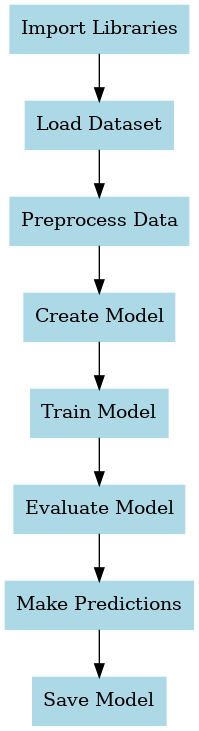

In [20]:
image = Image.open('pytorch.png') 
image 

In [13]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
import sklearn as sk 
from sklearn import datasets 
from sklearn import model_selection 
from sklearn import preprocessing 
from PIL import Image 
import os 


In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


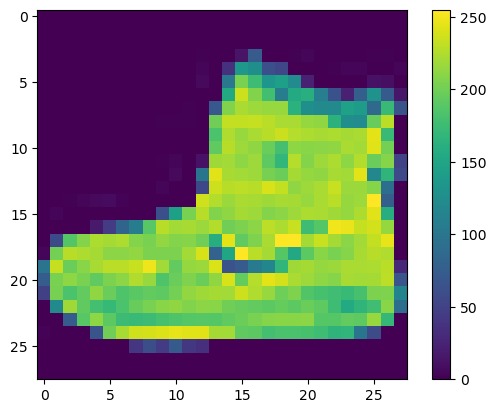

In [15]:
# display the data 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

# display the data

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


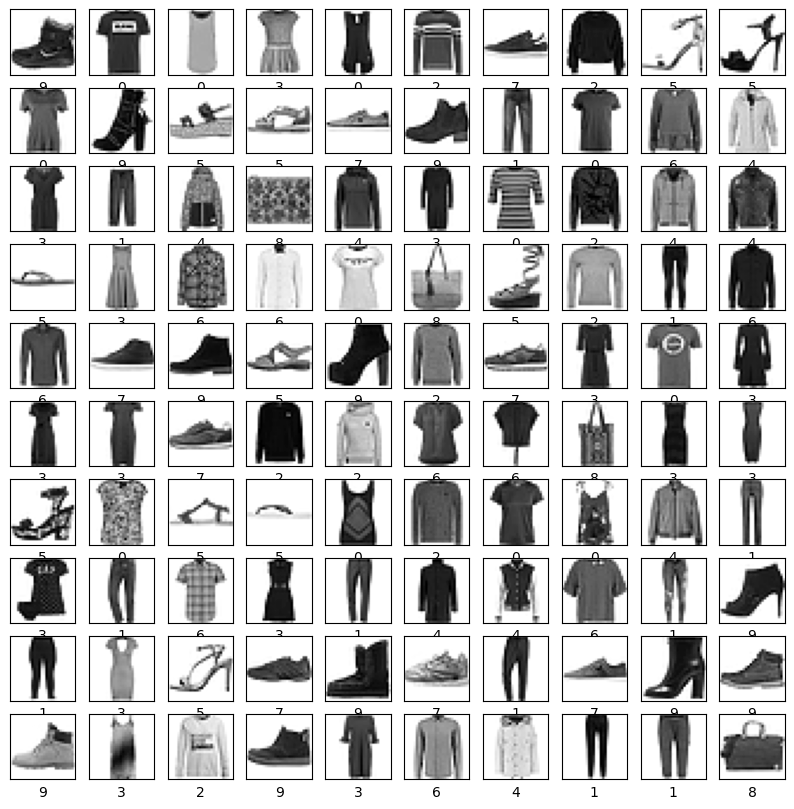

In [16]:
# display 10*10 images 
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


Epoch 1/5


2024-04-23 23:07:06.846675: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.7340 - loss: 0.7851
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.8399 - loss: 0.4644
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.8496 - loss: 0.4405
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.8554 - loss: 0.4210
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8557 - loss: 0.4159
313/313 - 0s - 935us/step - accuracy: 0.8459 - loss: 0.4441

Test accuracy: 0.8458999991416931
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
[6.6135055e-07 1.8978358e-07 1.8166793e-05 7.6522219e-06 7.6418373e-06
 1.0783433e-01 2.5950636e-05 6.3016377e-02 4.7090035e-03 8.2438010e-01]
9
9
The model predicted that the image is a:  9


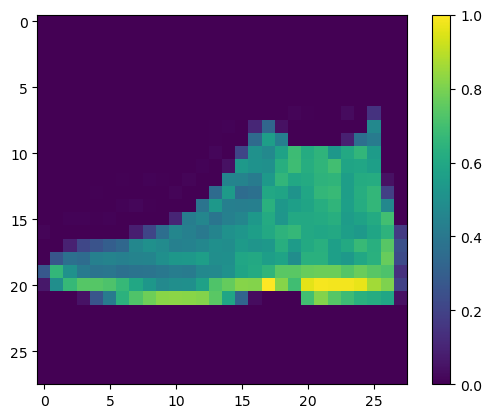

In [17]:
# logistic regression 
# flatten the images
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# normalize the images
train_images = train_images/255.0
test_images = test_images/255.0

# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# make predictions

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

# print(the fashion item that the model predicted )
print("The model predicted that the image is a: ", np.argmax(predictions[0])) 

# display the image
plt.figure()
plt.imshow(test_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()


In [18]:
# logistic regression using sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# create the model
model = LogisticRegression(max_iter=10000) 
model.fit(train_images, train_labels, sample_weight=None)

LogisticRegression(max_iter=10000)

9
9
The model predicted that the image is a:  9
The accuracy of the model is:  0.8441


<Figure size 640x480 with 0 Axes>

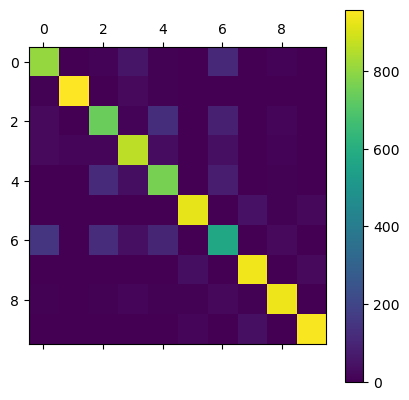

In [19]:
# make predictions 

predictions = model.predict(test_images)
print(predictions[0])
print(test_labels[0])

# print the fashion item that the model predicted
print("The model predicted that the image is a: ", predictions[0])

acc = accuracy_score(test_labels, predictions) 
print("The accuracy of the model is: ", acc)
conf_mat = confusion_matrix(test_labels, predictions) 
# plot the confusion matrix 
plt.figure()
plt.matshow(conf_mat)
plt.colorbar()
plt.show()
